In [2]:
import pandas as pd
import math
import numpy
import seaborn as sns

In [3]:
my_data = pd.read_excel('./datasets/Cars.xls')

In [4]:
my_data= pd.DataFrame(my_data)

In [5]:
my_data.head(5)

,Country,Car,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0,U.S.,Buick Estate Wagon,16.9,4.360,2.73,155,350,8
1,U.S.,Ford Country Squire Wagon,15.5,4.054,2.26,142,351,8
2,U.S.,Chevy Malibu Wagon,19.2,3.605,2.56,125,267,8
3,U.S.,Chrysler LeBaron Wagon,18.5,3.940,2.45,150,360,8
4,U.S.,Chevette,30.0,2.155,3.70,68,98,4


In [6]:

cars_x = my_data.iloc[:,3:7]
cars_y = my_data.iloc[:,2]


In [7]:
#y = cars_y.values
y = cars_y

In [8]:
log_cars_x = numpy.log10(cars_x)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Standardizing the features
x = StandardScaler().fit_transform(log_cars_x)

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(log_cars_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
expl = pca.explained_variance_ratio_
print(expl)

[0.93125432 0.04899324]


In [13]:
print('suma:',sum(expl[:]))

suma: 0.9802475675231104


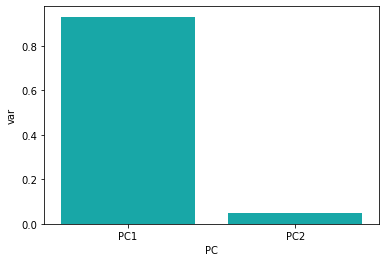

In [14]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})#,'PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [15]:
finalDf = pd.concat([principalDf,my_data['Country']], axis = 1)

In [16]:
finalDf

,principal component 1,principal component 2,Country
0,0.440729,0.051424,U.S.
1,0.432316,-0.035894,U.S.
2,0.283310,-0.016492,U.S.
3,0.437699,-0.002043,U.S.
4,-0.293747,-0.019649,U.S.
5,-0.078068,0.001059,Japan
6,-0.148416,0.053880,Japan
7,-0.237444,-0.023289,U.S.
8,-0.078516,0.107777,Germany
9,0.059504,0.117047,Sweden


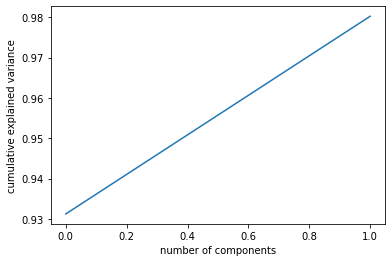

In [17]:
import matplotlib.pyplot as plt
import numpy as np
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [18]:
targets = pd.unique(my_data['Country']).tolist()
targets

['U.S.', 'Japan', 'Germany', 'Sweden', 'France', 'Italy']

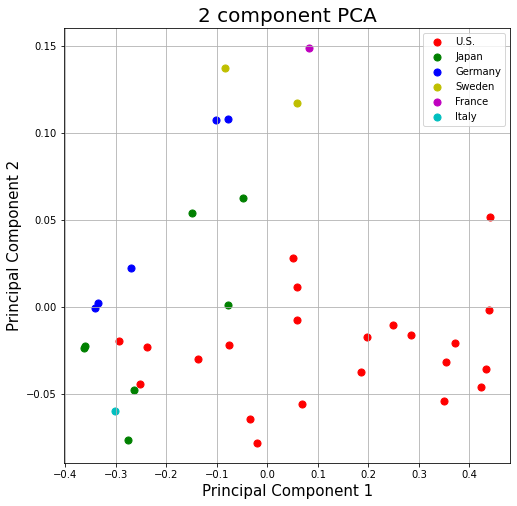

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#targets =['U.S.', 'Japan', 'Germany', 'Sweden', 'France', 'Italy']
colors = ['r', 'g', 'b','y','m','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Country'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()